In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import required Python Libraries

In [228]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import itertools
import operator
# Display plots inline and change default figure size
from IPython.display import display, clear_output
%matplotlib inline

import pickle

import warnings
warnings.filterwarnings("ignore")

# Function for Hyperparameter Tuning

In [4]:
def hyperparameter_tuning(network_type, X, y, threshold, max_iter, alpha,nodes=False):
    best_params = {}
    if network_type == 'LR': # To check if our neural network is of Logistic Regression type without any hidden layer
        for i in itertools.product(max_iter,alpha):
            w,b = logisticRegression_NN(X, y,i[0],i[1],threshold)
            y_pred = np.round(predict(w, b, X))
            acc = round(accuracy_score(y,y_pred)*100,2)
            best_params[i] = acc # Create a dictionary with key as the hyperparameters and value as the accuracy of the model for these params
        return max(best_params.items(), key=operator.itemgetter(1))[0] # Return best hyperparameters
    elif network_type == 'Shallow_NN': # To check if NN is SHallow NN
        for i in itertools.product(nodes,max_iter,alpha):
            vals = NN(X, y,i[0],i[1],i[2], threshold = 1e-6)
            y_pred = np.round(predict_NN(vals, X))
            acc = round(accuracy_score(y,y_pred)*100,2)
            best_params[i] = acc
        return max(best_params.items(), key=operator.itemgetter(1))[0]
    else:
        print("Invalid Choice...")
        return None

# Part 1

### Logistic Regression (Neural Network without Hidden Layer)

A Neural Netwrok with an input layer, a single output layer and no hidden layer acts as Logistic Regression model. The main objective of Simple Logistic Regession is to find the best hypothesis or line dividing the classes. Using straight line equation: z(x) = b + w1*x1 + w2*x2 our goal is to fidn the best weights and biase which gives us the closest prediction with our target value.

Need to apply an activation function (aka threshold function) to convert straight line equation into 0/1 values for classifier.
We have used Sigmoid function as our activation function : 𝑓(𝑧) = 1/(1+power(e,-z) where 𝑓(𝑧) is the sigmoidal or logistic function. We interpret 𝑦hat as the probability that the actual output y is 1, 
given a set of inputs x: 𝑦hat = P(y=1 | x; w, b).

To train a neural network the major taks involved is to find values for weights w and biase b such that the for all training cases the network predicted values are as close as possible to actual y. And to implement this we define a lost function for a single training case as we are using Stochastic Gradient Descent (optimization algorithm) to search for weights and biase that minimises cost for a given training set.

We define the Cost function or Log loss as:

J(w,b) = ylog(yhat) + (1-y)(log(1-yhat)) where y is actual and yhat is predicted and our goal is to minimize this cost.

We run for muliple iterations and at each iteration we randomly select a training case and find the cost for that iteration and if its difference from previous cost is very less we terminate otherwise we find the delta or derivatives of weights and biase and then update the new weights and biase and again iterate till we converge.

In [5]:
#Sigmoid Activation function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))            # Function to map the predicted values to probabilites

def costFunc(y,yhat): # Cost Function to minimize the error(absolute difference between y_actual and y_predicted)
        return -1*(y*(np.log(yhat)) + (1 - y)*(np.log(1 - yhat)))
    
#Neural Network without Hidden layer (Logistic Regression)
def logisticRegression_NN(X, y,max_iterations,alpha,threshold): 
    convergence = False
    n = X.shape[1] # No. of feature columns
    m = X.shape[0] # No. of rows
    # Initialise weights and biases
    w = np.random.uniform(0,0.01,n) 
    b = np.random.rand()
    previous_cost = sys.maxsize # Initialise cost variable with max value
    for i in range(max_iterations):
        # For Stochastic Gradient Descent select row index at random
        idx = np.random.randint(m)
        xj = X[idx] # Select random index record for feature cols
        yj = y[idx] # Select random index record for target col
        
        #Forward Propogation Stage
        z = np.dot(xj,w)+b 
        yhat = sigmoid(z) # Y predicted
        
        # Calculate cost suing actual and predicted y
        current_cost = costFunc(yj,yhat)
        
        # If the difference between cost for the current and previous iteration is less than a threshold value need to terminate as global minima reached
        if abs(previous_cost-current_cost) < threshold:
            convergence = True
            break
        previous_cost = current_cost
        
        # Gradient Descent Stage
        # Update weights
        delta_w = [None] * n
        for k in range(n):
            delta_w[k] = (yhat-yj)*xj[k]
        # Update biase
        delta_b = yhat-yj
        for l in range(n):
            w[l] -= alpha*delta_w[l]
        b -= alpha*delta_b
    
    return w,b

# Part 2

### Testing the part 1 Logistic Regression model on Moon and Blob dataset

In [6]:
#Reading both the datasets
df_moon = pd.read_csv("/content/drive/MyDrive/Study/Ms/moons400.csv")
df_blob = pd.read_csv("/content/drive/MyDrive/Study/Ms/blobs250.csv")

# splitting both dataset into X features and y class

y_moon = df_moon['Class'].values
y_blob = df_blob['Class'].values

del df_moon['Class']
del df_blob['Class']

X_moon = df_moon.values
X_blob = df_blob.values

#PErform normalization
X_moon = preprocessing.StandardScaler().fit_transform(X_moon)
X_blob = preprocessing.StandardScaler().fit_transform(X_blob)

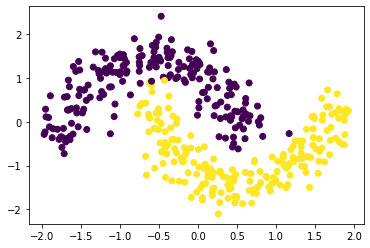

In [7]:
# moon dataset -------- non - linear
plt.scatter(X_moon[:,0], X_moon[:,1], c=y_moon)  


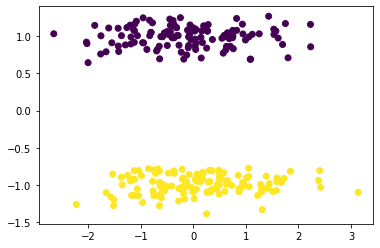

In [8]:
# blob dataset --------- linear
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob) 

In [9]:
# Predict function to calculate the predicted value of target variable
def predict(w,b, X):
    # Calculate the f(x)
    z = np.dot(X,w)+b
    # Calculate the predicted probability
    yhat = sigmoid(z)   
    
    for a in range(X.shape[0]):
        # If the probabiltiy is less than 50% then classify it as class 0 otherwise class 1
        if yhat[a] <0.5:
            yhat[a] = 0
        else:
            yhat[a] = 1
    
    return yhat

In [10]:
# Splitting datasets into train, validation and test
np.random.seed(30)

X_train_moon, X_test_moon, y_train_moon, y_test_moon =     \
            train_test_split(X_moon, y_moon, test_size=0.30, random_state=42)

X_val_moon, X_test_moon, y_val_moon, y_test_moon =    \
            train_test_split(X_test_moon, y_test_moon, test_size=0.50, random_state=42)


X_train_blob, X_test_blob, y_train_blob, y_test_blob =    \
            train_test_split(X_blob, y_blob, test_size=0.30, random_state=42)

X_val_blob, X_test_blob, y_val_blob, y_test_blob = \
            train_test_split(X_test_blob, y_test_blob, test_size=0.50, random_state=42)

In [11]:
#Parameter Tuning
alpha = [*np.arange(0.001, 0.02, 0.001)]
max_iterations = [*range(500, 20000, 500)]
threshold = 1e-6
# Pass the list of values for each paramter into hyperparameter function to get best params
best_params = hyperparameter_tuning("LR", X_val_moon, y_val_moon, threshold, max_iterations, alpha)
print(best_params)

(500, 0.006)


In [12]:
#Training both datasets
max_iterations = 500
alpha = 0.006
np.random.seed(30)
moon_weights,moon_bias = logisticRegression_NN(X_train_moon, y_train_moon,max_iterations,alpha,threshold)
blob_weights,blob_bias = logisticRegression_NN(X_train_blob, y_train_blob,max_iterations,alpha,threshold)

In [13]:
#Testing on both validation and testing

# moon training
moon_train_pred = np.round(predict(moon_weights, moon_bias, X_train_moon))
print("Accuracy on moon training set: ", round(accuracy_score(y_train_moon,moon_train_pred)*100,2),"%")

# predict moon validation set and report accuracy
moon_valid_pred = np.round(predict(moon_weights, moon_bias, X_val_moon))
print("Accuracy on moon validation set: ", round(accuracy_score(y_val_moon,moon_valid_pred)*100,2),"%")

# predict moon testing set and report accuracy
moon_test_pred = np.round(predict(moon_weights, moon_bias, X_test_moon))
print("Accuracy on moon testing set: ", round(accuracy_score(y_test_moon,moon_test_pred)*100,2),"%")



# predict blob training set and report accuracy
blob_train_pred = np.round(predict(blob_weights, blob_bias, X_train_blob))
print("\nAccuracy on blob training set: ", round(accuracy_score(y_train_blob,blob_train_pred)*100,2),"%")

# predict blob validation set and report accuracy
blob_valid_pred = np.round(predict(blob_weights, blob_bias, X_val_blob))
print("Accuracy on blob validation set: ", round(accuracy_score(y_val_blob,blob_valid_pred)*100,2),"%")

# predict blob testing set and report accuracy
blob_test_pred = np.round(predict(blob_weights, blob_bias, X_test_blob))
print("Accuracy on blob testing set: ", round(accuracy_score(y_test_blob,blob_test_pred)*100,2),"%")


Accuracy on moon training set:  82.14 %
Accuracy on moon validation set:  90.0 %
Accuracy on moon testing set:  90.0 %

Accuracy on blob training set:  100.0 %
Accuracy on blob validation set:  100.0 %
Accuracy on blob testing set:  100.0 %


# Part 3


### Training NN

https://matrices.io/deep-neural-network-from-scratch/

In [14]:
def sigmoid_NN(z):
    return 1.0 / (1 + np.exp(-z))            # Function to map the predicted values to probabilites


def derivative_sigmoid_NN(z):
    return z*(1-z)

def cost_NN(y,yhat):
    #return np.sum(np.square(yhat - y)) /2
    return -1.0*(y*(np.log(yhat)) + (1 - y)*(np.log(1 - yhat)))
    

In [73]:
def NN(X, y,hidden_nodes,max_iterations,alpha,threshold):
    input_nodes = X.shape[1]                                        # no. of cols of X
    output_nodes = 1                                                # no. of output nodes 
    
    #initialise weights going from input_nodes into hidden_nodes
    layer_1_weights = np.random.randn(input_nodes,hidden_nodes)*0.001
    
    #initialise weights going from hidden_nodes into output_node 
    layer_2_weights = np.random.randn(hidden_nodes,output_nodes)*0.001
  
    #initialise bias weights going into hidden_nodes  
    layer_1_bias = np.random.randn(hidden_nodes)*0.001
    layer_1_bias = layer_1_bias.reshape(1, hidden_nodes)
  
    #initialise bias weights going into output_node  
    layer_2_bias = np.random.randn(output_nodes)*0.001
    layer_2_bias = layer_2_bias.reshape(1, output_nodes)
  
    previous_cost = sys.maxsize                                     # setting initial cost = random value
  
    # setting while loop initial values 
    i = 0
    convergence = False
    # epoch = []
    # loss = []
    
    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # plt.ion()
    # ax.plot(epoch, loss, 'ro')
    # display(fig)
  
    while(i in range(max_iterations) and convergence != True):
        i+=1
  
        idx = np.random.randint(X.shape[0])                             # select 1 training case at random
        xj = X[idx].reshape(1,input_nodes)
        yj = y[idx]
      
        #forward propogation step
        layer_1_Z = np.dot(xj,layer_1_weights) + layer_1_bias      #layer 1 Z calculation
        layer_1_activation = sigmoid_NN(layer_1_Z)                                  # Activation of layer 1
      
        layer_2_Z = np.dot(layer_1_activation,layer_2_weights) + layer_2_bias  # layer 2 z calculation
        yhat = sigmoid_NN(layer_2_Z)                                                # Activation of layer 2 ~ yhat value
              
        cost = cost_NN(yj, yhat)[0,0]
        
        if abs(previous_cost - cost) < threshold:                       # Testing for convergence
            convergence = True
        previous_cost = cost                                            # set cost to previous for next iteration 
      
              
        #back propogation step
        # output layer
        error = yhat - yj
        #layer_2_delta_z = np.multiply(error,derivative_sigmoid_NN(yhat))
        layer_2_delta_z = yhat - yj
        layer_2_delta_weight = np.dot(layer_1_activation.T,layer_2_delta_z)
        layer_2_delta_bias = layer_2_delta_z
      
        # hidden layer
        layer_1_delta_z =  np.multiply(np.dot(layer_2_delta_z,layer_2_weights.T),derivative_sigmoid_NN(layer_1_Z))
        layer_1_delta_weight = np.dot(xj.T,layer_1_delta_z)
        layer_1_delta_bias = layer_1_delta_z
      
        #gradient descent update step
        layer_1_weights -= alpha * layer_1_delta_weight
        layer_2_weights -= alpha * layer_2_delta_weight
      
        layer_1_bias -= alpha * layer_1_delta_bias
        layer_2_bias -= alpha * layer_2_delta_bias

        # plot loss vs epoch
        # if (i % 10000 == 0):
        #   epoch.append(i/10000)
        #   loss.append(cost)
          
        #   ax.cla()
        #   ax.plot(epoch, loss)
    
        #   plt.xlim(min(epoch),max(epoch))
        #   plt.ylim(min(loss)-0.25,max(loss)+0.25)
    
        #   display(fig)
        #   clear_output(wait=True)

    return{ "layer_1_weights": layer_1_weights,
              "layer_2_weights": layer_2_weights,
              "layer_1_bias"   : layer_1_bias,
              "layer_2_bias"   : layer_2_bias
            }

In [74]:
def predict_NN(NN_parameters, X):
    layer_1_Z = np.dot(X,NN_parameters["layer_1_weights"]) + NN_parameters["layer_1_bias"]
    layer_1_activation = sigmoid_NN(layer_1_Z)                                  
        
    layer_2_Z = np.dot(layer_1_activation,NN_parameters["layer_2_weights"]) + NN_parameters["layer_2_bias"]
    yhat = sigmoid_NN(layer_2_Z)
    
    for a in range(X.shape[0]):
        if yhat[a] <0.5:
            yhat[a] = 0
        else:
            yhat[a] = 1
    
    return yhat

### Testing NN


In [35]:
# #Parameter Tuning
# nodes = [*range(1, 11, 1)]
# max_iterations = [*range(500, 20000, 500)]
# alpha = [*np.arange(0.001, 0.1, 0.001)]
# threshold = 1e-6
# best_params = hyperparameter_tuning("Shallow_NN", X_val_moon, y_val_moon, threshold, max_iterations, alpha,nodes)
# print(best_params)

### training both datasets 

In [75]:
# train moon dataset
# nodes = best_params[0]
# max_iterations = best_params[1]
# alpha = best_params[2]
np.random.seed(30)
moon_NN = NN(X_train_moon, y_train_moon,hidden_nodes = 3,max_iterations = 100000,alpha = 0.008, threshold = 1e-6)
blob_NN = NN(X_train_blob, y_train_blob,hidden_nodes = 4,max_iterations = 10000,alpha = 0.05, threshold = 1e-6)

### Testing accuracy on validation and testing set

In [76]:
# moon training
moon_train_pred = np.round(predict_NN(moon_NN, X_train_moon))
print("Accuracy on moon training set: ", round(accuracy_score(y_train_moon,moon_train_pred)*100,2),"%")

# predict moon validation set and report accuracy
moon_valid_pred = np.round(predict_NN(moon_NN, X_val_moon))
print("Accuracy on moon validation set: ", round(accuracy_score(y_val_moon,moon_valid_pred)*100,2),"%")

# predict moon testing set and report accuracy
moon_test_pred = np.round(predict_NN(moon_NN, X_test_moon))
print("Accuracy on moon testing set: ", round(accuracy_score(y_test_moon,moon_test_pred)*100,2),"%")



# predict blob training set and report accuracy
blob_train_pred = np.round(predict_NN(blob_NN, X_train_blob))
print("\nAccuracy on blob training set: ", round(accuracy_score(y_train_blob,blob_train_pred)*100,2),"%")

# predict blob validation set and report accuracy
blob_valid_pred = np.round(predict_NN(blob_NN, X_val_blob))
print("Accuracy on blob validation set: ", round(accuracy_score(y_val_blob,blob_valid_pred)*100,2),"%")

# predict blob testing set and report accuracy
blob_test_pred = np.round(predict_NN(blob_NN, X_test_blob))
print("Accuracy on blob testing set: ", round(accuracy_score(y_test_blob,blob_test_pred)*100,2),"%")




Accuracy on moon training set:  87.86 %
Accuracy on moon validation set:  88.33 %
Accuracy on moon testing set:  91.67 %

Accuracy on blob training set:  100.0 %
Accuracy on blob validation set:  100.0 %
Accuracy on blob testing set:  100.0 %


# Part 4

In [59]:
# This function taken from the CIFAR website

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [60]:
def loadbatch(batchname):
    folder = '/content/drive/MyDrive/Study/Ms/cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

In [61]:
def loadlabelnames():
    folder = '/content/drive/MyDrive/Study/Ms/cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [62]:
import matplotlib.pyplot as plt

def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (32,32) 
    picture = np.rot90(picture)
    print(picture)
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    # picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()

In [63]:
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch 1 is", len(batch1))
batch2 = loadbatch('data_batch_2')
print("Number of items in the batch 2 is", len(batch2))

# Display all keys, so we can see the ones we want
print('All keys in the batch 1:', batch1.keys())
print('All keys in the batch 2:', batch2.keys())

Number of items in the batch 1 is 4
Number of items in the batch 2 is 4
All keys in the batch 1: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
All keys in the batch 2: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [64]:
data1 = batch1[b'data'][:,:1024]
data2 = batch2[b'data'][:,:1024]
data = np.vstack([data1, data2]) 
data = data.astype('float32')
data /= 255

labels1 = np.array(batch1[b'labels'])
labels2 = np.array(batch2[b'labels'])
labels = np.append(labels1, labels2)

names = loadlabelnames()

In [ ]:
# # Display a few images from the batch
# for i in range (1,2):
#    visualise(data, i)
#    print("Image", i,": Class is ", names[labels[i]])

In [65]:
df = pd.DataFrame(data)
df['Class'] = labels

In [66]:
df['Class'] = df['Class'].astype('int')

df = df.loc[df['Class'].isin([2,3])]

di = {2: 0, 3: 1}

df.replace({"Class": di}, inplace=True)

# splitting both dataset into X features and y class

y = df['Class'].values

del df['Class']

X = df.values

In [67]:
X.shape

(4053, 1024)

In [68]:
np.random.seed(30)

X_train_images, X_test_images, y_train_images, y_test_images =     \
            train_test_split(X, y, test_size=0.30, random_state=42)

X_val_images, X_test_images, y_val_images, y_test_images =    \
            train_test_split(X_test_images, y_test_images, test_size=0.50, random_state=42)



In [ ]:
# #Parameter Tuning
# nodes = [*range(1, 2, 1)]
# max_iterations = [*range(500, 2000, 500)]
# alpha = [*np.arange(0.001, 0.003, 0.001)]
# threshold = 1e-6
# best_params = hyperparameter_tuning("Shallow_NN", X_val_images, y_val_images, threshold, max_iterations, alpha,nodes)
# print(best_params)

In [77]:
# train image dataset
np.random.seed(30)
image_NN = NN(X_train_images, y_train_images, hidden_nodes = 100,max_iterations = 150500,alpha = 0.001, threshold = 1e-6)

In [78]:
# Image training
images_train_pred = np.round(predict_NN(image_NN, X_train_images))
print("Accuracy on Image training set: ", round(accuracy_score(y_train_images,images_train_pred)*100,2),"%")

# predict Image validation set and report accuracy
images_valid_pred = np.round(predict_NN(image_NN, X_val_images))
print("Accuracy on Image validation set: ", round(accuracy_score(y_val_images,images_valid_pred)*100,2),"%")

# predict Image testing set and report accuracy
images_test_pred = np.round(predict_NN(image_NN, X_test_images))
print("Accuracy on Image testing set: ", round(accuracy_score(y_test_images,images_test_pred)*100,2),"%")



Accuracy on Image training set:  60.66 %
Accuracy on Image validation set:  58.72 %
Accuracy on Image testing set:  59.05 %


# Part 5 - Rishi's Enhancement

In [79]:
def augment(data, index,labels):
    augmented_data = []
    augmented_class = []
    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 32x32 pixels
    picture.shape = (32,32) 
    augmented_data.append(np.rot90(picture))
    augmented_class.append(labels[index])
    augmented_data.append(np.fliplr(picture))
    augmented_class.append(labels[index])
    augmented_data = np.array(augmented_data)
    augmented_data = augmented_data.reshape(2,1024)
    augmented_class = np.array(augmented_class)
    
    return augmented_data,augmented_class

In [80]:
# Display a few images from the batch
for i in range(len(data)):
   augmented_data, augmented_class = augment(X_train_images, i,y_train_images)
   X_train_images = np.vstack ((X_train_images, augmented_data) )
   y_train_images = np.append(y_train_images,augmented_class)

In [81]:
#variable number of output nodes

def enhanced_NN(X, y,hidden_nodes,max_iterations,alpha,threshold,optimizer,decay_rate_1=False,decay_rate_2=False,epsilon = 1e-8):
    input_nodes = X.shape[1]                                        # no. of cols of X
    output_nodes = 1                                                # no. of output nodes 
    layer_1_velocity_w = 0
    layer_2_velocity_w = 0
    layer_1_acceleration_w = 0
    layer_2_acceleration_w = 0
    layer_1_velocity_b = 0
    layer_2_velocity_b = 0
    layer_1_acceleration_b = 0
    layer_2_acceleration_b = 0
    #initialise weights going from input_nodes into hidden_nodes
    layer_1_weights = np.random.randn(input_nodes,hidden_nodes)*0.001

    #initialise weights going from hidden_nodes into output_node 
    layer_2_weights = np.random.randn(hidden_nodes,output_nodes)*0.001

    #initialise bias weights going into hidden_nodes  
    layer_1_bias = np.random.randn(hidden_nodes)*0.001
    layer_1_bias = layer_1_bias.reshape(1, hidden_nodes)

    #initialise bias weights going into output_node  
    layer_2_bias = np.random.randn(output_nodes)*0.001
    layer_2_bias = layer_2_bias.reshape(1, output_nodes)

    previous_cost = sys.maxsize                                     # setting initial cost = random value

    # setting while loop initial values 
    i = 0
    time_step = 0
    convergence = False

    while(i in range(max_iterations) and convergence != True):

        i+=1
        idx = np.random.randint(X.shape[0])                             # select 1 training case at random
        xj = X[idx].reshape(1,input_nodes)
        yj = y[idx]

        #forward propogation step
        layer_1_Z = np.dot(xj,layer_1_weights) + layer_1_bias      #layer 1 Z calculation
        layer_1_activation = sigmoid_NN(layer_1_Z)                                  # Activation of layer 1

        layer_2_Z = np.dot(layer_1_activation,layer_2_weights) + layer_2_bias  # layer 2 z calculation
        yhat = sigmoid_NN(layer_2_Z)                                                # Activation of layer 2 ~ yhat value

        cost = cost_NN(yj, yhat)[0,0]

        if abs(previous_cost - cost) < threshold:                       # Testing for convergence
            # print(convergence)
            convergence = True
        previous_cost = cost                                            # set cost to previous for next iteration 


        #back propogation step
        # output layer
        layer_2_delta_z = yhat - yj
        layer_2_delta_weight = np.dot(layer_1_activation.T,layer_2_delta_z)
        layer_2_delta_bias = layer_2_delta_z

        # hidden layer
        layer_1_delta_z =  np.multiply(np.dot(layer_2_delta_z,layer_2_weights.T),derivative_sigmoid_NN(layer_1_Z))
        layer_1_delta_weight = np.dot(xj.T,layer_1_delta_z)
        layer_1_delta_bias = layer_1_delta_z
        if optimizer == 'sgd':
            #gradient descent update step
            layer_1_weights -= alpha * layer_1_delta_weight
            layer_2_weights -= alpha * layer_2_delta_weight

            layer_1_bias -= alpha * layer_1_delta_bias
            layer_2_bias -= alpha * layer_2_delta_bias

        if optimizer == 'adam':
            # Gradients for each layer
            w2 = layer_1_activation.dot(layer_2_delta_weight)
            w1 = xj.dot(layer_1_delta_weight)
            b2 = layer_1_activation.T.dot(layer_2_delta_bias)
            b1 = xj.T.dot(layer_1_delta_bias)

            time_step += 1 # Increment Time Step
            # Weights
            # Computing 1st and 2nd moment for each layer
            layer_2_velocity_w = layer_2_velocity_w * decay_rate_1 + (1- decay_rate_1) * w2
            layer_1_velocity_w = layer_1_velocity_w * decay_rate_1 + (1- decay_rate_1) * w1

            layer_2_acceleration_w = layer_2_acceleration_w * decay_rate_2 + (1- decay_rate_2) * (w2 ** 2)
            layer_1_acceleration_w = layer_1_acceleration_w * decay_rate_2 + (1- decay_rate_2) * (w1 ** 2)

            layer_2_velocity_corrected_w = layer_2_velocity_w / (1-(decay_rate_1 ** time_step))
            layer_2_acceleration_corrected_w = layer_2_acceleration_w / (1-(decay_rate_2 ** time_step))

            # Computing bias-corrected moment
            layer_1_velocity_corrected_w = layer_1_velocity_w / (1-(decay_rate_1 ** time_step))
            layer_1_acceleration_corrected_w = layer_1_acceleration_w / (1-(decay_rate_2 ** time_step))

            # Update Weights
            layer_2_weights_update = layer_2_velocity_corrected_w / (np.sqrt(layer_2_acceleration_corrected_w) + epsilon)
            layer_1_weights_update = layer_1_velocity_corrected_w / (np.sqrt(layer_1_acceleration_corrected_w) + epsilon)

            # Update Biases
            layer_2_weights_update = layer_2_velocity_corrected_w / (np.sqrt(layer_2_acceleration_corrected_w) + epsilon)
            layer_1_weights_update = layer_1_velocity_corrected_w / (np.sqrt(layer_1_acceleration_corrected_w) + epsilon)

            layer_2_weights -= (alpha * layer_2_weights_update)
            layer_1_weights -= (alpha * layer_1_weights_update)


            # Biases
            # Computing 1st and 2nd moment for each layer
            layer_2_velocity_b = layer_2_velocity_b * decay_rate_1 + (1- decay_rate_1) * b2
            layer_1_velocity_b = layer_1_velocity_b * decay_rate_1 + (1- decay_rate_1) * b1

            layer_2_acceleration_b = layer_2_acceleration_b * decay_rate_2 + (1- decay_rate_2) * (b2 ** 2)
            layer_1_acceleration_b = layer_1_acceleration_b * decay_rate_2 + (1- decay_rate_2) * (b1 ** 2)

            layer_2_velocity_corrected_b = layer_2_velocity_b / (1-(decay_rate_1 ** time_step))
            layer_2_acceleration_corrected_b = layer_2_acceleration_b / (1-(decay_rate_2 ** time_step))

            # Computing bias-corrected moment
            layer_1_velocity_corrected_b = layer_1_velocity_b / (1-(decay_rate_1 ** time_step))
            layer_1_acceleration_corrected_b = layer_1_acceleration_b / (1-(decay_rate_2 ** time_step))

            #Update Biases
            layer_2_biase_update = layer_2_velocity_corrected_b / (np.sqrt(layer_2_acceleration_corrected_b) + epsilon)
            layer_1_biase_update = layer_1_velocity_corrected_b / (np.sqrt(layer_1_acceleration_corrected_b) + epsilon)
            layer_2_bias -= (alpha * layer_2_biase_update[0])
            layer_1_bias -= (alpha * layer_1_biase_update[0])

    return{ "layer_1_weights": layer_1_weights,
            "layer_2_weights": layer_2_weights,
            "layer_1_bias"   : layer_1_bias,
            "layer_2_bias"   : layer_2_bias
          }   

In [82]:
# train image dataset
np.random.seed(30)
enhanced_image_NN = enhanced_NN(X_train_images, y_train_images, hidden_nodes = 10,max_iterations = 150500,alpha = 0.001, threshold = 1e-6,optimizer="adam",decay_rate_1=0.9,decay_rate_2=0.99,epsilon = 1e-8)

In [83]:
# Image training
images_train_pred = np.round(predict_NN(enhanced_image_NN, X_train_images))
print("Accuracy on Image training set: ", round(accuracy_score(y_train_images,images_train_pred)*100,2),"%")

# predict Image validation set and report accuracy
images_valid_pred = np.round(predict_NN(enhanced_image_NN, X_val_images))
print("Accuracy on Image validation set: ", round(accuracy_score(y_val_images,images_valid_pred)*100,2),"%")

# predict Image testing set and report accuracy
images_test_pred = np.round(predict_NN(enhanced_image_NN, X_test_images))
print("Accuracy on Image testing set: ", round(accuracy_score(y_test_images,images_test_pred)*100,2),"%")



Accuracy on Image training set:  50.37 %
Accuracy on Image validation set:  49.18 %
Accuracy on Image testing set:  50.99 %


# Part 5 - Rahul's Enhancement

In [162]:
def relu(z):
   return np.maximum(0,z)                  #Return maximum of 0 and input - ReLU

def derivative_relu(z):
    return np.where(z >= 0, 1, 0)          #Return derivative of ReLU

def new_cost(y,yhat):
    #Return the cost
    return np.sum(-1.0*(y*(np.log(yhat)) + (1 - y)*(np.log(1 - yhat))))/2
    # return np.sum(np.square(yhat - y)) /2

In [199]:
def enhanced_NN2(X, y,hidden_nodes,epochs,batch_size, alpha,threshold):
    input_nodes = X.shape[1]                                        # no. of cols of X
    output_nodes = 1                                                # no. of output nodes 
    
    #initialise weights going from input_nodes into hidden_nodes
    layer_1_weights = np.random.randn(input_nodes,hidden_nodes)*0.001
    # print("layer_1_weights.shape: ",layer_1_weights.shape)
    
    #initialise weights going from hidden_nodes into output_node 
    layer_2_weights = np.random.randn(hidden_nodes,output_nodes)*0.001
    # print("layer_2_weights.shape: ",layer_2_weights.shape)
  
    #initialise bias weights going into hidden_nodes  
    layer_1_bias = np.random.randn(hidden_nodes)*0.001
    layer_1_bias = layer_1_bias.reshape(1, hidden_nodes)
    # print("layer_1_bias.shape: ",layer_1_bias.shape)
  
    #initialise bias weights going into output_node  
    layer_2_bias = np.random.randn(output_nodes)*0.001
    layer_2_bias = layer_2_bias.reshape(1, output_nodes)
    # print("layer_2_bias.shape: ",layer_2_bias.shape)
  
    previous_cost = sys.maxsize                                     # setting initial cost = random value
  
    # setting while loop initial values 
    i = 0
    convergence = False
    # no_of_batches = int(X.shape[0]/batch_size)
    #print("x.shape[0]: ", X.shape[0], "\nbatch_size: ",batch_size, "\nno_of_batches: ", no_of_batches)
    # batch_start = 0
    epoch = []
    loss = []
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    ax.plot(epoch, loss, 'ro')
    display(fig)

    while(i in range(epochs) and convergence != True):
        i+=1

        # print("epoch No: ", i)

        for j in range(1):

          xj = X
          yj = y
          yj = yj.reshape(len(yj),1)

          # xj = X[batch_start:batch_size]
          # yj = y[batch_start:batch_size]
          # yj = yj.reshape(len(yj),1)

          # print("\nBatch no: ",j)
      
          #forward propogation step
          layer_1_Z = np.dot(xj,layer_1_weights) + layer_1_bias                       #layer 1 Z calculation
          layer_1_activation = relu(layer_1_Z)                                  # Activation of layer 1
          # print("\nlayer_1_Z.shape : ",layer_1_Z.shape)
          # print("layer_1_activation.shape : ",layer_1_activation.shape)
      
          layer_2_Z = np.dot(layer_1_activation,layer_2_weights) + layer_2_bias       # layer 2 z calculation
          yhat = sigmoid_NN(layer_2_Z)                                                # Activation of layer 2 ~ yhat value
          # print("\nlayer_2_Z.shape : ",layer_2_Z.shape)
          # print("yhat.shape : ",yhat.shape)
              
          cost = new_cost(yj, yhat)

          # print("\ncost: ", cost)
        
          if abs(previous_cost - cost) < threshold:                       # Testing for convergence
            convergence = True
        
          previous_cost = cost                                            # set cost to previous for next iteration 
      
          #back propogation step
          # output layer
          error = yhat - yj
          #layer_2_delta_z = yhat - yj
          layer_2_delta_z = np.multiply(error,derivative_sigmoid_NN(yhat))
          layer_2_delta_weight = np.dot(layer_1_activation.T,layer_2_delta_z)
          layer_2_delta_bias = np.sum(layer_2_delta_z,axis=0,keepdims=True)
          # print("\nlayer_2_delta_z.shape : ",layer_2_delta_z.shape)
          # print("\nlayer_2_delta_weight.shape : ",layer_2_delta_weight.shape)
          # print("\nlayer_2_delta_bias.shape : ",layer_2_delta_bias.shape)
          # print("error: ", error.shape)
          # print("derivative sigmoid: ",derivative_sigmoid_NN(yhat).shape)
          # print("yhat:", yhat.shape)
          # print("yj:", yj.shape)
      
          # hidden layer
          layer_1_delta_z =  np.multiply(np.dot(layer_2_delta_z,layer_2_weights.T),derivative_relu(layer_1_Z))
          layer_1_delta_weight = np.dot(xj.T,layer_1_delta_z)
          layer_1_delta_bias = np.sum(layer_1_delta_z,axis=0,keepdims=True)
          # print("\nlayer_1_delta_z.shape : ",layer_1_delta_z.shape)
          # print("\nlayer_1_delta_weight.shape : ",layer_1_delta_weight.shape)
          # print("\nlayer_1_delta_bias.shape : ",layer_1_delta_bias.shape)
      
          #gradient descent update step
          layer_1_weights -= alpha * layer_1_delta_weight
          layer_2_weights -= alpha * layer_2_delta_weight
      
          layer_1_bias -= alpha * layer_1_delta_bias
          layer_2_bias -= alpha * layer_2_delta_bias

          #Resetting the batch 
          # batch_start = batch_start + batch_size 
          # batch_size = batch_size + batch_size

          # plot loss vs epoch
          #if (i % 10000 == 0):
          epoch.append(i)
          loss.append(cost)
          
          ax.cla()
          ax.plot(epoch, loss)
    
          plt.xlim(min(epoch),max(epoch))
          plt.ylim(min(loss)-0.25,max(loss)+0.25)
          plt.xlabel("Epochs")
          plt.ylabel("Loss")
    
          display(fig)
          clear_output(wait=True)

    return{ "layer_1_weights": layer_1_weights,
              "layer_2_weights": layer_2_weights,
              "layer_1_bias"   : layer_1_bias,
              "layer_2_bias"   : layer_2_bias
            }

In [200]:
def predict_NN2(NN_parameters, X):
    layer_1_Z = np.dot(X,NN_parameters["layer_1_weights"]) + NN_parameters["layer_1_bias"]
    layer_1_activation = relu(layer_1_Z)                                  
        
    layer_2_Z = np.dot(layer_1_activation,NN_parameters["layer_2_weights"]) + NN_parameters["layer_2_bias"]
    yhat = sigmoid_NN(layer_2_Z)
    
    for a in range(X.shape[0]):
        if yhat[a] <0.5:
            yhat[a] = 0
        else:
            yhat[a] = 1
    
    return yhat

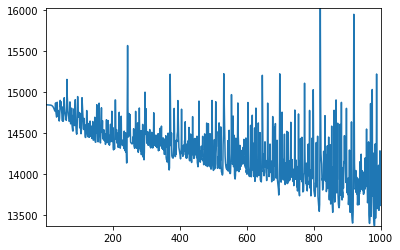

In [224]:
# train image dataset
np.random.seed(30)
image_NN21 = enhanced_NN2(X_train_images, y_train_images, hidden_nodes = 100, epochs = 1000, batch_size = 500, alpha = 0.0001, threshold = 1e-6)

In [225]:
# Image training
images_train_pred = np.round(predict_NN2(image_NN21, X_train_images))
print("Accuracy on Image training set: ", round(accuracy_score(y_train_images,images_train_pred)*100,2),"%")

# predict Image validation set and report accuracy
images_valid_pred = np.round(predict_NN2(image_NN21, X_val_images))
print("Accuracy on Image validation set: ", round(accuracy_score(y_val_images,images_valid_pred)*100,2),"%")

# predict Image testing set and report accuracy
images_test_pred = np.round(predict_NN2(image_NN21, X_test_images))
print("Accuracy on Image testing set: ", round(accuracy_score(y_test_images,images_test_pred)*100,2),"%")



Accuracy on Image training set:  64.2 %
Accuracy on Image validation set:  64.64 %
Accuracy on Image testing set:  64.8 %
